# 永田の方法による放射熱伝達率の計算のテスト
## 2次元長方形を仮定して計算する

- vertical:horizon=1:dの長方形断面を想定
- 永田先生の方式で放射熱伝達率を計算
- 表面温度を仮定した時の放射熱量収支を確認する

In [1]:
# 分割数
nd = 1000

In [2]:
import sys
sys.path.append('..')
from matplotlib import pyplot as plt
import numpy as np

from heat_load_calc.core import shape_factor as e7

In [3]:
# 空間と境界の関係（今回は4つの境界がすべて空間に属するとする）
p_js_is = np.array([[1], [1], [1], [1]])

In [4]:
# アスペクト比を仮定
d = [x / 10.0 for x in range(1, nd)]

In [5]:
# 各面の微小球に対する放射熱伝達率を計算
y = [e7.get_h_r_js(a_srf_js=np.array([[1.0], [d1], [1.0], [d1]]),
                   p_js_is=p_js_is) for d1 in d]

In [6]:
# 計算結果の取り出し
y1 = [y[a][0] for a in range(nd - 1)]
y2 = [y[a][1] for a in range(nd - 1)]

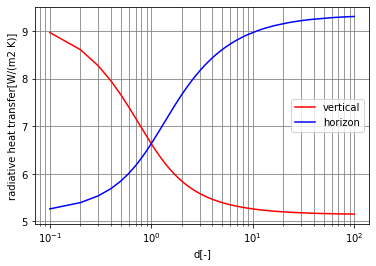

In [7]:
# グラフの描画
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('d[-]')
ax1.set_ylabel('radiative heat transfer[W/(m2 K)]')

plt.grid(which='major',color='gray',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='-')

plt.plot(d,y1,linestyle='solid',color='r', label='vertical')
plt.plot(d,y2,linestyle='solid',color='b', label='horizon')

plt.xscale('log')
plt.legend()
plt.show()

In [8]:
# 各面の表面温度を仮定
t_surf_js = np.array([[20.0], [18.0], [16.0], [14.0]])

In [9]:
# 各面の面積
a_surf = [np.array([[1.0], [d1], [1.0], [d1]]) for d1 in d]

In [10]:
# 平均放射温度の計算
t_mrt = [np.sum(t_surf_js* a_surf * y[a]) / np.sum(y[a] * a_surf) for a in range(nd - 1)]

In [11]:
# 放射熱収支の計算
# 結果を小数点以下5桁で丸める
heat_balance = [np.array(round(np.sum(a_surf * y[a] * (t_mrt[a] - t_surf_js)), 5)) for a in range(nd - 1)]

In [12]:
print(np.sum(np.abs(heat_balance)))

0.0
